# Калькулятор расчета вероятности для случайной величины

https://gallery.shinyapps.io/dist_calc/

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from scipy.stats import ttest_ind, ttest_rel, ttest_1samp, mannwhitneyu
from scipy import stats

[Преамбула (Не пропусти!)](https://www.youtube.com/watch?v=T5qytDfOe-I&ab_channel=VBMStorage)

# Task_0 (Experiment)

Представим, что у нас есть ГС и мы можем многократно делать из нее случайные выборки. Так как у каждой выборки среднее (выборочное) будет близко к среднему по ГС, следовательно, Разница между выборочными средними для двух случайных выборок будет близка к нулю.

* Если мы будем многократно делать из ГС по две случайных выборки и для каждой пары находить разницу средних, получем множество значений, распределенных вокруг нуля. Давайте проделаем этот эксперименти в этом убедимся!
* Найдем стандартное отклонение полученного распределения (набора `diff`), то есть стандартную ошибку и сравним результат с результатом ручного рассчета по формуле:

$$se = \sqrt{\frac{sd_1^2}{n_1} + \frac{sd_2^2}{n_2}}$$

In [ ]:
population = np.random.normal(20, 5, 10000) # ГС

In [ ]:
diff = []
for _ in range(1000):
  diff.append(np.random.choice(population, 100).mean() - np.random.choice(population, 100).mean())
diff = np.array(diff)

`diff` - множество разниц между средними для каждой пары случайных выборок.

In [ ]:
diff.mean() # Так и есть, средняя разница близка к нулю.

-0.00909028441869443

<Axes: ylabel='Density'>

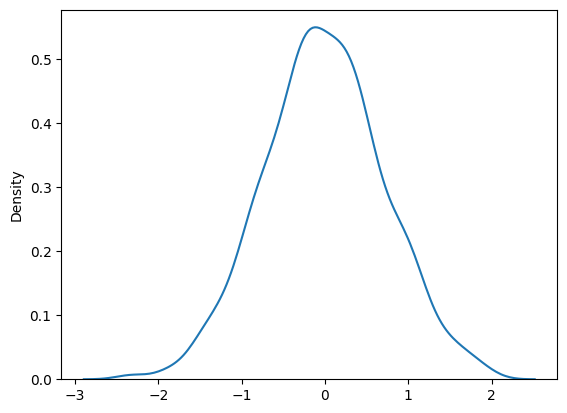

In [ ]:
sns.kdeplot(diff)

In [ ]:
np.array(diff).std() # фактическая стандартная ошибка

0.6867046882612081

In [ ]:
x_1 = np.random.choice(population, 100) # Сделаем две случайных выборки
x_2 = np.random.choice(population, 100)

se = np.sqrt(x_1.std()**2 / 100 + x_2.std()**2 / 100)
se # теоретическия стандартная ошибка.

# запустите этот код несколько раз и убедитесь, что значение близко к фактическому значению стандартной ошибки

0.6727438431296067

# Task_1

Нам даны три выборки. Две из них взяты из одной ГС а одна из другой.
* Изучите графики доверительных интервалов для среднего согласно t-распределению и на основании их сделайте предположение, какая выборка тут "лишняя".

* Выполните двухвыборочный t-test используя ручной рассчет.

$$se = \sqrt{\frac{sd_1^2}{n_1} + \frac{sd_2^2}{n_2}}$$
$$t = \frac{\overline{x_1} - \overline{x_2}}{se}$$
$$df = n_1 + n_2 -2$$

* Выполните t-test используя готовый метод `ttest_ind()`

In [ ]:
sample_1 = np.array([19.32676221, 29.19425263, 26.38138814, 23.30351141, 15.86729213,
       26.56226576, 22.81763438, 21.84699593, 24.50040797, 14.58707147,
       15.83566726, 19.42263153,  7.25222997, 23.06690226, 18.5503099 ,
       18.77449153, 23.23823752, 20.01519695, 19.06254618, 18.29220525,
       23.64318159, 19.70347702, 20.03019837, 27.64422373, 17.74567421,
       28.59407019, 25.43322908, 13.73170486, 16.38700447, 17.97451892,
       26.91960857, 12.23604337, 19.31477735, 22.13408118, 23.18771673,
       16.99851246, 26.75822073, 23.41398823, 16.41607913, 20.57899818,
       31.44778042, 19.45369714, 22.51142021, 12.65522557, 21.45369355,
       21.25283488,  8.12452244, 19.18425206, 18.34660642, 21.42529687])

sample_2 = np.array([28.16087199, 19.57157364, 19.69313723, 26.1223764 ,  9.17506298,
       23.09347692, 16.56632958, 19.04314943, 15.71324736, 25.40170373,
        1.77015849,  6.2347795 , 22.58815879, 14.62512495, 22.78149315,
       18.90764505, 24.94628249, 14.45038939, 33.27078999, 27.47014221,
       20.45378078, 20.98295988, 22.00621928, 13.81176238, 21.76232766,
       16.03957935, 25.00872183, 17.17154106, 29.35597764, 14.0781291 ,
       24.54732569, 14.63152582, 18.1126436 , 16.29480125, 27.32549987,
       18.71224832, 27.56135303, 13.62446997, 25.36059819, 15.352573  ,
       16.28245193, 26.35831355, 22.39554352, 22.39286931, 27.28039476,
       22.90562574, 24.91221731, 20.17785347, 20.46876683, 23.31015328])

sample_3 = np.array([29.72482333, 25.13024257, 26.83283622, 21.30779387, 21.35056719,
       27.27630039, 22.18939331, 15.40218464, 27.83084198, 22.43124828,
       24.81339447, 25.24017089, 23.72453759, 24.9097882 , 27.90344715,
       30.34866467, 29.15375367, 27.88165091, 26.07759598, 37.92786476,
       34.01311434, 23.07935809, 20.27185194, 29.40127197, 22.22136825,
       23.38207988, 28.59205407, 25.45416981, 31.27406025, 26.14801427,
       28.44215563, 27.09963257, 23.69491734, 25.76824525, 28.40769086,
       23.20955749, 25.678573  , 27.85338663, 18.76747052, 21.83558655,
       26.3647069 , 39.04867948, 17.31217972, 15.87556111, 32.99525821,
       21.92166055, 24.22249314, 13.94931494, 25.65191879, 24.62079928])

In [ ]:
from scipy.stats import t
df = pd.DataFrame({'Выборка1':sample_1, 'Выборка2':sample_2, 'Выборка3':sample_3}).agg(['mean','std','count','sem']).transpose()
df.columns = ['Mx','SD','N','SE']
p = 0.95
K = t.ppf((1 + p)/2,  df['N']-1)
df['interval'] = K * df['SE']
df

,Mx,SD,N,SE,interval
Выборка1,20.451973,5.022881,50.0,0.710343,1.427487
Выборка2,20.365282,6.042270,50.0,0.854506,1.717194
Выборка3,25.480285,4.976330,50.0,0.703759,1.414257


<ipython-input-63-7cf150ff070b>:1: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  plt.errorbar(x=df.index, y=df['Mx'], yerr=df['interval'],\


<ErrorbarContainer object of 3 artists>

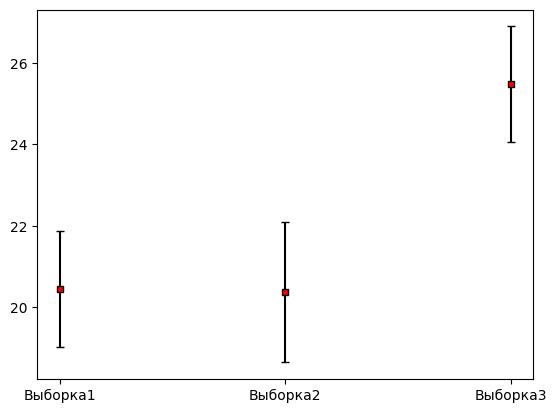

In [ ]:
plt.errorbar(x=df.index, y=df['Mx'], yerr=df['interval'],\
                      color="black", capsize=3, marker="s", markersize=4, mfc="red", mec="black", fmt ='o')

# Task_2

Мы взяли две группы клиентов и одной из групп сделали рекламную акцию. Каждое наблюдение - это количество посещений клиентом сайта за фиксированный период времени.
* Сделайте t-test для выявления различий между группами.
* Сделайте тест U-критерия Манна-Уитни. Почему мы видим такую разницу? Проверьте выбросы. Они сильно искажают результаты теста.
* Почистите данные от выбросов и попробуйте снова провести тесты. Выбросы можно удалить при помощи 1.5 межквартильных интервалов.

In [ ]:
clients_A = np.array([14., 22., 23., 14., 24., 19., 13., 32., 24., 10., 16., 19., 17.,
       28., 29., 19., 21., 15., 21., 23., 20., 14., 20., 19., 12., 25.,
       20., 30., 18., 20., 22., 22., 20., 20., 16., 23., 16., 14., 26.,
       13., 18., 23., 19., 24., 27., 22., 20., 31., 25., 24., 21., 23.,
       18., 22., 24., 26., 13., 22., 23., 23., 13., 27., 14., 28., 25.,
       16., 16., 19., 22., 22., 20., 23., 30., 15., 28., 36., 25., 22.,
       14., 21., 14., 24.,  5., 21.,  7., 16., 22., 21., 21., 19., 17.,
       23., 12., 18., 24., 18., 19., 20., 22., 21.])
clients_B = np.array([20., 20., 19., 20., 18., 24., 23., 17., 19., 17., 19., 18., 21.,
       22., 23., 21., 17., 21., 0., 23., 22., 19., 26., 20., 16., 21.,
       21., 18., 20., 21., 21., 24., 16., 14., 17., 17., 20., 18., 20.,
       16., 16., 15., 27., 24., 25., 22., 18., 16., 19., 17., 19., 24.,
       22., 23., 21., 19., 24., 170., 24., 16., 23., 19., 17., 25., 20.,
       25., 25., 19., 18., 23., 18., 23., 24., 27., 200., 19., 18., 21.,
       17., 21., 18., 21., 19., 20., 16., 19., 200., 13., 216., 26., 23.,
       19., 20., 21., 20., 19., 17., 23., 230., 16.])

# Task_3

У нас есть интернет магазин и мы внимательно следим за своими покупателями. У нас отобрана группа из 100 клиентов и по этой группе собрана статистика с усредненным чеком за месяц в USD, которая представлена в первом наборе данных. Мы решили провести эксперимент и для этих же людей провели рекламную акцию. Затем наблюдали за ними весь следующий месяц и снова собрали статистику. Проведите тесты:

* Двухвыборочный t-тест `ttest_ind` двух независимых выборок
* Парный t-тест `ttest_rel` двух зависимых выборок

Какой из них в этом случае корректно использовать? Сработала ли рекламная акция?

In [ ]:
clients = np.array([555., 465., 593., 493., 500., 357., 431., 506., 333., 510., 442.,
                    446., 467., 575., 545., 468., 653., 491., 416., 338., 332., 483.,
                    174., 438., 588., 434., 610., 459., 409., 743., 353., 354., 539.,
                    334., 459., 618., 362., 505., 598., 594., 331., 563., 613., 480.,
                    594., 644., 592., 470., 345., 650., 521., 339., 410., 491., 514.,
                    514., 664., 693., 497., 554., 409., 569., 558., 341., 479., 528.,
                    350., 424., 473., 439., 454., 525., 412., 630., 381., 620., 540.,
                    587., 539., 600., 623., 419., 614., 383., 529., 507., 448., 520.,
                    437., 428., 613., 408., 432., 393., 396., 557., 439., 415., 466.,
                    577.])

clients_modified = np.array([588., 487., 612., 500., 513., 403., 442., 517., 358., 537., 449.,
                            466., 474., 585., 572., 487., 675., 523., 442., 361., 348., 509.,
                            178., 456., 588., 451., 649., 461., 443., 753., 387., 388., 588.,
                            362., 469., 649., 413., 534., 618., 623., 344., 608., 622., 485.,
                            622., 647., 621., 474., 377., 658., 526., 363., 427., 507., 521.,
                            563., 672., 714., 557., 559., 426., 587., 563., 343., 498., 559.,
                            378., 432., 491., 452., 501., 540., 430., 652., 390., 627., 551.,
                            618., 548., 634., 624., 439., 616., 401., 538., 513., 505., 528.,
                            449., 454., 664., 441., 454., 422., 407., 558., 470., 421., 506.,
                            581.])

# Task_4

Перед нами массив наблюдений `arr`.

Для многих статистических тестов нам необходимо чтобы данные имели распределение близкое к нормальному. ДЛя проверки распределения на нормальность существуют методики:

* QQ-plot (квантиль-квантиль плот). Этот метод позволяет сравнить элементы множества по своим рангам (квантилям) с эталонным нормальным распределением. Все точки наблюдений должны располагаться близко к прямой. Ниже написан код построения данного графика
* Тест Шапиро-Уилко. Возвращает p-value. Нулевая гипотеза утверждает, что распределение нормально. Тест сильно уязвим перед выбросами.
* Тест Колмогорова-Смирнова. Возвращает p-value. Нулевая гипотеза утверждает, что распределение нормально. Тест также крайне сильно уязвим перед выбросами. (Имхо: Очень противный тест который вечно выкобенивается и все время бухтит на данные)

Посмотрите на результаты тестов и примите меры по устранению причин, которые вызвали у вас опасения касательно адекватности тестов.


In [ ]:
arr = np.concatenate([np.random.normal(100, 10, 200), np.array([400, 500])])

In [ ]:
shapiro_test = stats.shapiro(arr)
print(shapiro_test)
print('Шапиро-Уилко: Выборка распредена нормально.') if shapiro_test[1] > 0.05 else print('Шапиро-Уилко: Выборка распредена ненормально.')
print()

ks_test = stats.kstest(arr, 'norm')
print(ks_test)
print('Колмогоров-Смирнов: Выборка распредена нормально.') if ks_test[1] > 0.05 else print('Колмогоров-Смирнов: Выборка распредена ненормально.')

ShapiroResult(statistic=0.2770490050315857, pvalue=1.814539741600717e-27)
Шапиро-Уилко: Выборка распредена ненормально.

KstestResult(statistic=1.0, pvalue=0.0, statistic_location=63.81691014467167, statistic_sign=-1)
Колмогоров-Смирнов: Выборка распредена ненормально.


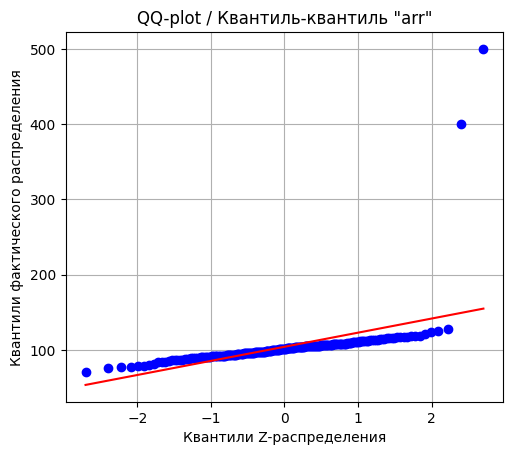

In [ ]:
plt.figure(figsize = [6.4*3, 4.8])  # Создаем фигуру qq_plot
plt.subplot(1, 3, 1)
norm = stats.probplot(arr, dist="norm", plot=plt)  # Создаем график QQ-plot при помощи функции по поиску квантелей значений нашего распределения
plt.title('QQ-plot / Квантиль-квантиль "arr"')  # Заголовок
plt.xlabel('Квантили Z-распределения')  # Подпись по оси X
plt.ylabel('Квантили фактического распределения')  # Подпись по оси Y
plt.grid(True)

Если у вас еще остались сомнения, проведите непараметрический тест Мана-Уитни `mannwhitneyu` сравнив массив с исправленными недочетами с эталонной нормальной выборкой `normal_arr`.

In [ ]:
normal_arr = np.random.normal(100, 10, 100000)

# Task_5

Перед нами данные по земельным участкам. Все участки представлены в виде двух групп.

Первая группа - это участки в Столице, и по ним мы знаем

* price_1 - Стоимости в долларах
* sq_1 - Площади этих участков

Вторая группа - это участки либо в Столице либо в другом городе регионального значения. По ним мы также знаем

* price_2 - Стоимости в долларах
* sq_2 - Площади этих участков

Задача:

Выясните, вторая группа - это участки в столице или в регионе?

Для выбора типа теста проверьте данные на нормальность распределения. Не забывайте про нормирование данных.

In [ ]:
!wget 'https://www.dropbox.com/scl/fi/uipxh7emvsdqsupm91hc5/lend_market.csv?rlkey=zkss0vmf0xkhcre4wofawh9ad&dl=0'

In [ ]:
df = pd.read_csv('lend_market.csv?rlkey=zkss0vmf0xkhcre4wofawh9ad&dl=0')

In [ ]:
df

,sq_1,sq_2,price_1,price_2
0,10.0,98.0,143649.370684,9.964814e+05
1,11.0,48.0,119876.602349,3.796865e+05
2,10.0,84.0,57634.748942,5.965443e+05
3,6.0,89.0,87603.111613,1.078165e+06
4,6.0,26.0,59828.615336,2.921165e+05
...,...,...,...,...
495,9.0,21.0,116183.002636,1.301508e+05
496,10.0,90.0,112742.679232,8.568423e+05
497,10.0,23.0,87065.569674,1.456783e+05
498,11.0,51.0,145891.374494,3.298557e+05


In [ ]:
price_1 = np.array(df.price_1)
price_2 = np.array(df.price_2)
sq_1 = np.array(df.sq_1)
sq_2 = np.array(df.sq_2)

# Task_6

Перед нами набор данных по успеваемости студентов.
* score - усредненный балл успеваемости по 100-бальной шкале для каждого студента
* age - возраст студента
* stage - предложена ли студенту гарантированная стажировка. 1-да, 0-нет.

* Давайте попробуем выяснить, влияет ли факт обещанной стажировки на успеваемость студентов. Сперва посмотрите на распределение интересующей величины.
* Чтобы исследование было более полным, давайте разделим студентов на возрастные страты (группы):
  1. 18 - 25 лет
  2. 25 - 30 лет
  3. 30 + лет
  Для каждой страты посмотрим влияние на успеваемость факта обещанной стажировки. Какие выводы сделаем? Можете также посмотреть на сколько процентов по каждой группе отличается средний балл в зависимости от предложенной стажировки.

In [ ]:
!wget 'https://www.dropbox.com/scl/fi/eozut9ngdvviajgg6h7dx/student_score.csv?rlkey=z1ypuhqloj9sr7fgjz9tbdufr&dl=0'

In [ ]:
df = pd.read_csv('student_score.csv?rlkey=z1ypuhqloj9sr7fgjz9tbdufr&dl=0')
df.head()

,score,age,stage
0,45.0,29.0,0.0
1,38.2,23.0,1.0
2,60.4,25.0,1.0
3,24.3,24.0,1.0
4,78.2,50.0,0.0


In [ ]:
students = np.array(df)

In [ ]:
students

array([[45. , 29. ,  0. ],
       [38.2, 23. ,  1. ],
       [60.4, 25. ,  1. ],
       ...,
       [82.6, 51. ,  1. ],
       [13.2, 18. ,  0. ],
       [83.5, 49. ,  0. ]])

# Task_7



In [ ]:
# Просто запусти этот код, человек!)
def get_plot(x:np.ndarray, y:np.ndarray):
  plt.subplots()
  plt.axhline(y=y.mean(), color='black', linestyle='--')
  plt.axvline(x=x.mean(), color='black', linestyle='--')
  x2, y2 = x.mean(), y.mean()
  for i, j in zip(x, y):
    if (i>0 and j>0) or (i<0 and j<0):
      x1, y1 = i, j
      width = abs(x1 - x2)
      height = abs(y1 - y2)
      rect = patches.Rectangle((min(x1, x2), min(y1, y2)), width, height, linewidth=1, edgecolor='r', facecolor='pink', alpha=0.5)
      plt.gca().add_patch(rect)
    else:
      x1, y1 = i, j
      width = abs(x1 - x2)
      height = abs(y1 - y2)
      rect = patches.Rectangle((min(x1, x2), min(y1, y2)), width, height, linewidth=1, edgecolor='b', facecolor='lightblue', alpha=0.5)
      plt.gca().add_patch(rect)
  sns.scatterplot(x=x, y=y, color='black')
  plt.xlabel('X')
  plt.ylabel('Y')

Дан набор данных в виде двух независимых переменных. Давайте попробуем сделать вычисления по данной формуле и осмыслить результат.

$$C = \frac{\sum_{i=1}^{n}{(x_i - \overline{x})(y_i - \overline{y})}}{n-1}$$

In [ ]:
x = np.random.randn(100)
y = x + np.random.randn(100)*.7

x_1 = np.random.randn(100)
y_1 = np.random.randn(100)

x_2 = np.random.randn(100)
y_2 = -x_2 + np.random.randn(100)*.5

<Axes: >

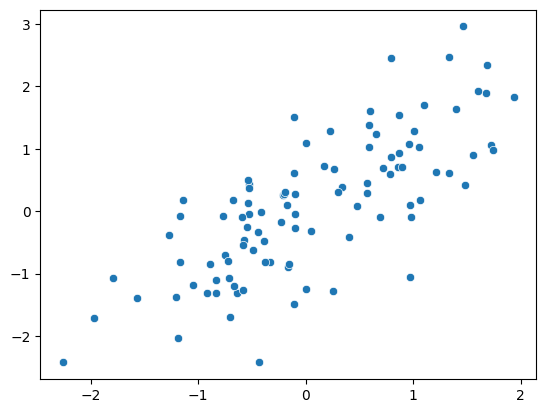

In [ ]:
sns.scatterplot(x=x, y=y)
#plt.axhline(y=y.mean(), color='black', linestyle='--')
#plt.axvline(x=x.mean(), color='black', linestyle='--')

Геометрический смысл:

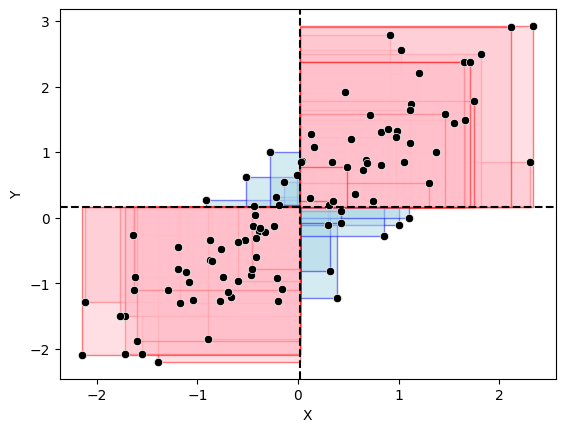

In [ ]:
get_plot(x, y)